# Carbon instensity of Sustainable PV for Energy Transition
This analysis explores the carbon implications of different PV sustainability/circular economy designs in the context of achieving energy transition. These calculations build upon previous work that can be found in journals 13 and 17.

Attempt 1

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'CarbonAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
carbonfolder = str(Path().resolve().parent.parent / 'PV_ICE'/ 'baselines'/ 'CarbonLayer')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')
energyanalysisfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__

'v0.2.0+518.g0d1b7b2.dirty'

In [4]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [5]:
#load in the simulation from Energy Analysis journal
sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\sim1.pkl')

sim1.calculateCarbonFlows()

sim1.scenario['r_PERC'].dataOut_c

In [6]:
sim1.scenario['r_PERC'].dataOut_m

,Area,Cumulative_Active_Area,EOL_BadStatus,EOL_Landfill0,EOL_PATHS,EOL_PG,Effective_Capacity_[W],Landfill_0_ProjLife,MerchantTail_Area,MerchantTail_[W],...,Yearly_Sum_Area_PathsBad,Yearly_Sum_Area_PathsGood,Yearly_Sum_Area_atEOL,Yearly_Sum_Power_EOLby_Degradation,Yearly_Sum_Power_EOLby_Failure,Yearly_Sum_Power_EOLby_ProjectLifetime,Yearly_Sum_Power_PathsBad,Yearly_Sum_Power_PathsGood,Yearly_Sum_Power_atEOL,irradiance_stc
0,5.237421e+06,5.237421e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.520622e+08,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1070.0
1,2.381558e+06,7.618978e+06,5.019410e-03,2.844333e-02,5.019410e-03,0.000000e+00,1.092986e+09,0.000000e+00,0.0,0.0,...,3.346274e-02,0.000000e+00,3.346274e-02,0.0,4.769010e+00,0.000000e+00,4.769010e+00,0.000000e+00,4.769010e+00,1070.0
2,2.399211e+06,1.001819e+07,3.883317e-01,2.200546e+00,3.883317e-01,0.000000e+00,1.437059e+09,0.000000e+00,0.0,0.0,...,2.588878e+00,0.000000e+00,2.588878e+00,0.0,3.662374e+02,0.000000e+00,3.662374e+02,0.000000e+00,3.662374e+02,1070.0
3,3.636895e+06,1.365505e+07,4.784439e+00,2.711182e+01,4.784439e+00,0.000000e+00,1.965030e+09,0.000000e+00,0.0,0.0,...,3.189626e+01,0.000000e+00,3.189626e+01,0.0,4.481373e+03,0.000000e+00,4.481373e+03,0.000000e+00,4.481373e+03,1070.0
4,7.372109e+06,2.102697e+07,2.774546e+01,1.572243e+02,2.774546e+01,0.000000e+00,3.051979e+09,0.000000e+00,0.0,0.0,...,1.849697e+02,0.000000e+00,1.849697e+02,0.0,2.582007e+04,0.000000e+00,2.582007e+04,0.000000e+00,2.582007e+04,1070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7.591823e+09,3.541404e+11,1.667387e+08,1.552650e+09,4.657949e+09,4.491210e+09,8.508872e+13,1.497070e+09,0.0,0.0,...,2.223183e+08,4.491210e+09,6.210598e+09,0.0,4.896471e+10,1.297565e+12,4.896471e+10,9.731736e+11,1.346529e+12,1070.0
97,8.003568e+09,3.554404e+11,1.278019e+08,1.675878e+09,5.027633e+09,4.899831e+09,8.530804e+13,1.633277e+09,0.0,0.0,...,1.704025e+08,4.899831e+09,6.703511e+09,0.0,3.775151e+10,1.415620e+12,3.775151e+10,1.061715e+12,1.453372e+12,1070.0
98,4.560406e+09,3.574687e+11,1.455385e+08,6.330470e+08,1.899141e+09,1.753602e+09,8.552736e+13,5.845342e+08,0.0,0.0,...,1.940513e+08,1.753602e+09,2.532188e+09,0.0,4.301322e+10,5.066369e+11,4.301322e+10,3.799777e+11,5.496501e+11,1070.0
99,4.619609e+09,3.594903e+11,1.708910e+08,6.494993e+08,1.948498e+09,1.777607e+09,8.574668e+13,5.925356e+08,0.0,0.0,...,2.278547e+08,1.777607e+09,2.597997e+09,0.0,5.050157e+10,5.135720e+11,5.050157e+10,3.851790e+11,5.640736e+11,1070.0


## Project grid forward to 100% re in 2050
To parallel the PV deployment, we will assume that we globally hit 100% RE in 2050 with the 75 TW of PV. As such, we need to change the future projection of marketshares of the different country grids.

One scenario with decarb grid, one scenario with decarb grid and heat

Estimating that 60-70% generation will be from Solar, 30-40% from wind, and any remainder from "other renewables"

In [7]:
countrygridmix = pd.read_csv(os.path.join(carbonfolder,'baseline_countrygridmix.csv'), index_col='year')
gridsources = ['Bioenergy','Hydro','Nuclear','OtherFossil','OtherRenewables','Solar','Wind']
nonRE = ['Coal','Gas','OtherFossil','Nuclear','Bioenergy']

In [8]:
countrygridmix.loc[2023:,:]=np.nan #delete 2023 to 2050
nonRE_search = '|'.join(nonRE) #create nonRE search
countrygridmix.loc[2050, countrygridmix.columns.str.contains(nonRE_search)] = 0.0 #set all nonRE to 0 in 2050

In [9]:
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Solar')] = 63.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Wind')] = 33.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Hydro')] = 3.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('OtherRenewables')] = 1.0
#numbers derived from leading scenario electricity generation Breyer et al 2022 scenarios (EU focused)

In [10]:
countrygridmix_100RE2050 = countrygridmix.interpolate() #linearly interpolate between 2022 and 2050

In [11]:
apnd_idx = pd.RangeIndex(start=2051,stop=2101,step=1) #create temp df
apnd_df = pd.DataFrame(columns=countrygridmix_100RE2050.columns, index=apnd_idx )
countrygridmix_100RE20502100 = pd.concat([countrygridmix_100RE2050.loc[2000:],apnd_df], axis=0) #extend through 2100
countrygridmix_100RE20502100.ffill(inplace=True) #propogate 2050 values through 2100

In [12]:
countrygridmix_100RE20502100.loc[2050]

China_Bioenergy            0.0
China_Coal                 0.0
China_Gas                  0.0
China_Hydro                3.0
China_Nuclear              0.0
                          ... 
Zambia_Nuclear             0.0
Zambia_OtherFossil         0.0
Zambia_OtherRenewables     1.0
Zambia_Solar              63.0
Zambia_Wind               33.0
Name: 2050, Length: 472, dtype: float64

This is a simple projection, assumes all countries have same ratio of PV and wind (which we know can't be true). Update in future with country specific projections.

In [59]:
pd.read_csv(os.path.join(carbonfolder,'baseline_electricityemissionfactors.csv'))

,Energy Source,CO2eq_gpWh_IPCC2006,CO2eq_gpWh_ember,CO2_gpWh_EIA,CO2_gpWh_EPA
0,Bioenergy,0.3005,0.230,0.0000,0.3170
1,Coal,0.3487,0.820,0.3215,0.3380
2,Gas,0.2291,0.490,0.1805,0.1810
3,Hydro,0.0000,0.024,0.0000,0.0000
4,Nuclear,0.0000,0.012,0.0000,0.0000
5,OtherFossil,0.2671,0.700,0.2413,0.0000
6,OtherRenewables,0.0000,0.038,0.0000,0.0000
7,Solar,0.0000,0.048,0.0000,0.0000
8,Wind,0.0000,0.011,0.0000,0.0000
9,SteamAndHeat,0.0000,0.000,0.0000,0.2266


In [13]:
sim1.calculateCarbonFlows(countrygridmixes=countrygridmix_100RE20502100)



>>>> Calculating Carbon Flows <<<<

Working on Scenario:  PV_ICE
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_PERC
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_SHJ
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on C

# Carbon Analysis
this will become the aggregate carbon results function

In [14]:
scenarios = sim1.scenario

In [25]:
sim_carbon_results = pd.DataFrame()
sim_annual_carbon = pd.DataFrame()
for scen in scenarios:
    print(scen)
    mod_carbon_scen_results = sim1.scenario[scen].dataOut_c.add_prefix(str(scen+'_'))
    
    #mod annual carbon calcs here (selecting to avoid double counting)
    mod_mfg_carbon_total = mod_carbon_scen_results.filter(like='Global_gCO2eqpwh_mod_MFG_gCO2eq') #annual mfging carbon

    mod_nonvMFG = ['Install','OandM','Repair','Demount','Store','Resell','ReMFG','Recycle'] #could remove from loop
    nonvMFG_search = '|'.join(mod_nonvMFG) #create nonRE search
    mod_carbon_sum_nonvmfg = mod_carbon_scen_results.loc[:,mod_carbon_scen_results.columns.str.contains(nonvMFG_search)] #annual non mfging carbon
    scen_annual_carbon_mod = pd.concat([mod_mfg_carbon_total,mod_carbon_sum_nonvmfg], axis=1)
    scen_annual_carbon_mod[scen+'_Annual_Emit_mod_gCO2eq'] = scen_annual_carbon_mod.sum(axis=1)

    scenmatdc = pd.DataFrame()
    for mat in MATERIALS:
        print(mat)
        mat_carbon_scen_results = sim1.scenario[scen].material[mat].matdataOut_c.add_prefix(str(scen+'_'+mat+'_')) 
        
        #calculation for annual carbon emissions total (selecting to avoid double countings)
        mat_vmfg_total = mat_carbon_scen_results.filter(like='vMFG_total')
        mat_ce_recycle = mat_carbon_scen_results.filter(like='Recycle_e_p')
        mat_ce_remfg = mat_carbon_scen_results.filter(like='ReMFG_clean')
        mat_landfill = mat_carbon_scen_results.filter(like='landfill_total')
        mat_scen_annual_carbon = pd.concat([mat_vmfg_total,mat_ce_recycle,mat_ce_remfg,mat_landfill], axis=1)
        mat_scen_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq'] = mat_scen_annual_carbon.sum(axis=1)
        
        scenmatdc = pd.concat([scenmatdc,mat_carbon_scen_results,
                               mat_scen_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq']], axis=1) #group all material dc
    
    scen_carbon_results = pd.concat([mod_carbon_scen_results,scenmatdc], axis=1) #append mats to mod
    sim_carbon_results = pd.concat([sim_carbon_results, scen_carbon_results], axis=1) #append all scens "raw" data
    
    #calculate annual carbon emits with grouping by mod and mat
    scen_mats_annual_carbon = scenmatdc.filter(like='Annual_Emit')
    scen_mod_annual_carbon = scen_annual_carbon_mod.filter(like='Annual_Emit_mod')
    scen_annual_carbon = pd.concat([scen_mod_annual_carbon,scen_mats_annual_carbon], axis=1)
    scen_annual_carbon[scen+'_Annual_Emit_total_modmats_gCO2eq'] = scen_annual_carbon.sum(axis=1)
    sim_annual_carbon = pd.concat([sim_annual_carbon,scen_annual_carbon], axis=1)
    
    #FIX INDEX of dfs
sim_annual_carbon.index = pd.RangeIndex(start=2000,stop=2101,step=1)
sim_carbon_results.index = pd.RangeIndex(start=2000,stop=2101,step=1)
    
#return sim_carbon_results, sim_annual_carbon

PV_ICE
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_SHJ
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_TOPCon
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_IRENA
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_High_eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Circular
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_EffLife
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_50PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_RecycledPERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_Eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
b

In [26]:
sim_carbon_results

,PV_ICE_China_mod_MFG_gCO2eq,PV_ICE_India_mod_MFG_gCO2eq,PV_ICE_Taiwan_mod_MFG_gCO2eq,PV_ICE_Germany_mod_MFG_gCO2eq,PV_ICE_Japan_mod_MFG_gCO2eq,PV_ICE_SKorea_mod_MFG_gCO2eq,PV_ICE_Canada_mod_MFG_gCO2eq,PV_ICE_Mexico_mod_MFG_gCO2eq,PV_ICE_USA_mod_MFG_gCO2eq,PV_ICE_VietNam_mod_MFG_gCO2eq,...,h_Perovskite_Eff_backsheet_mat_LQeol_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_LQ_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_HQmfg_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_HQeol_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_HQ_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_vMFG_energy_gCO2eq,h_Perovskite_Eff_backsheet_mat_vMFG_total_gCO2eq,h_Perovskite_Eff_backsheet_mat_Recycle_e_p_gCO2eq,h_Perovskite_Eff_backsheet_mat_landfill_total_gCO2eq,h_Perovskite_Eff_Annual_Emit_backsheet_gCO2eq
2000,1.490720e+10,8.778652e+09,1.506950e+09,4.210061e+09,0.000000e+00,0.000000e+00,1.321286e+09,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,5.416681e+09,1.594903e+10,0.0,5.410401e+06,1.595444e+10
2001,5.200993e+09,3.174821e+09,5.524517e+08,1.495652e+09,0.000000e+00,0.000000e+00,4.899445e+08,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.965729e+09,5.811551e+09,0.0,1.990172e+06,5.813541e+09
2002,6.402249e+09,3.895751e+09,6.692447e+08,1.827843e+09,0.000000e+00,0.000000e+00,5.731889e+08,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,2.447836e+09,7.208651e+09,0.0,2.437570e+06,7.211088e+09
2003,1.002663e+10,5.976334e+09,1.043181e+09,2.817423e+09,0.000000e+00,0.000000e+00,9.028619e+08,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,3.842068e+09,1.126637e+10,0.0,3.896548e+06,1.127026e+10
2004,2.023425e+10,1.167869e+10,2.123439e+09,5.621726e+09,0.000000e+00,0.000000e+00,1.715761e+09,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,7.930545e+09,2.338246e+10,0.0,8.131327e+06,2.339059e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,5.816686e+11,1.786652e+10,6.015652e+09,4.158809e+09,2.206891e+09,1.444851e+10,1.744481e+09,2.113257e+09,6.454689e+09,3.302150e+10,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2097,7.316159e+11,2.247230e+10,7.566416e+09,5.230901e+09,2.775802e+09,1.817317e+10,2.194188e+09,2.658030e+09,8.118632e+09,4.153406e+10,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2098,7.782622e+11,2.390509e+10,8.048834e+09,5.564412e+09,2.952781e+09,1.933185e+10,2.334085e+09,2.827500e+09,8.636259e+09,4.418218e+10,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
2099,8.255575e+11,2.535781e+10,8.537965e+09,5.902564e+09,3.132223e+09,2.050665e+10,2.475928e+09,2.999328e+09,9.161087e+09,4.686715e+10,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00


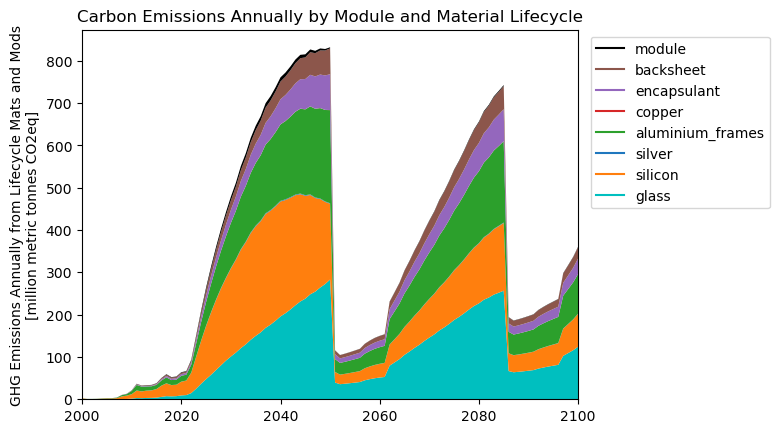

In [27]:
pvice_annual_carbon = sim_annual_carbon.filter(like='Annual_Emit').filter(like='PV_ICE')/1e12 #million tonnes
pvice_annual_carbon.index = pd.RangeIndex(start=2000,stop=2101,step=1)

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots

plt.plot([],[],color=colormats[0], label=MATERIALS[0])
plt.plot([],[],color=colormats[1], label=MATERIALS[1])
plt.plot([],[],color=colormats[2], label=MATERIALS[2])
plt.plot([],[],color=colormats[3], label=MATERIALS[3])
plt.plot([],[],color=colormats[4], label=MATERIALS[4])
plt.plot([],[],color=colormats[5], label=MATERIALS[5])
plt.plot([],[],color=colormats[6], label=MATERIALS[6])
plt.plot([],[],color=colormats[7], label='module')


plt.stackplot(pvice_annual_carbon.index,
              pvice_annual_carbon['PV_ICE_Annual_Emit_glass_gCO2eq'], 
              pvice_annual_carbon['PV_ICE_Annual_Emit_silicon_gCO2eq'],
              pvice_annual_carbon['PV_ICE_Annual_Emit_silver_gCO2eq'], 
              pvice_annual_carbon['PV_ICE_Annual_Emit_aluminium_frames_gCO2eq'], 
              pvice_annual_carbon['PV_ICE_Annual_Emit_copper_gCO2eq'],
              pvice_annual_carbon['PV_ICE_Annual_Emit_encapsulant_gCO2eq'],
              pvice_annual_carbon['PV_ICE_Annual_Emit_backsheet_gCO2eq'],
              pvice_annual_carbon['PV_ICE_Annual_Emit_mod_gCO2eq'],
              colors = colormats)
plt.title('Carbon Emissions Annually by Module and Material Lifecycle')
plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes CO2eq]')
plt.xlim(2000,2100)

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))

#plt.legend()
plt.show()

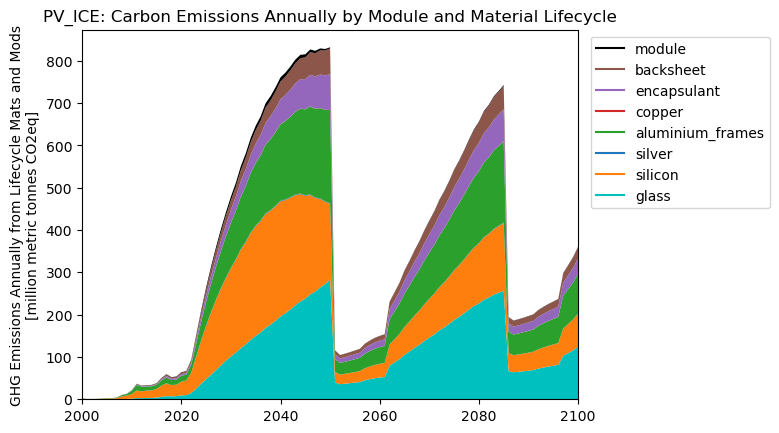

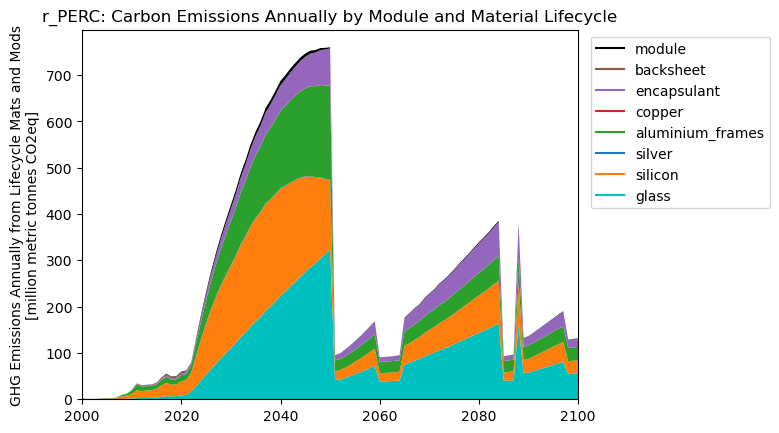

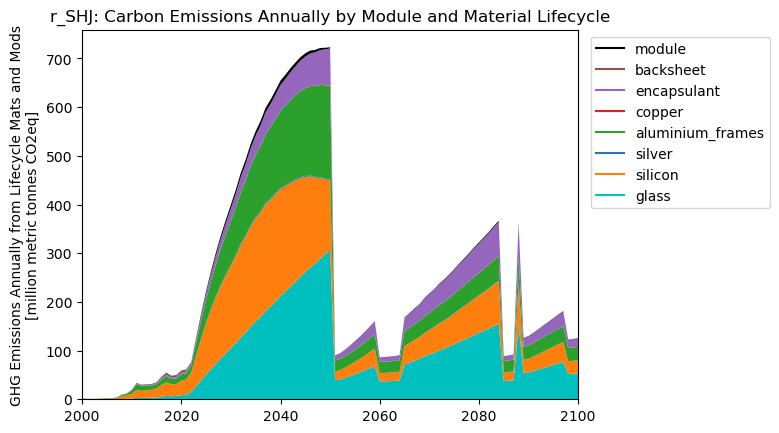

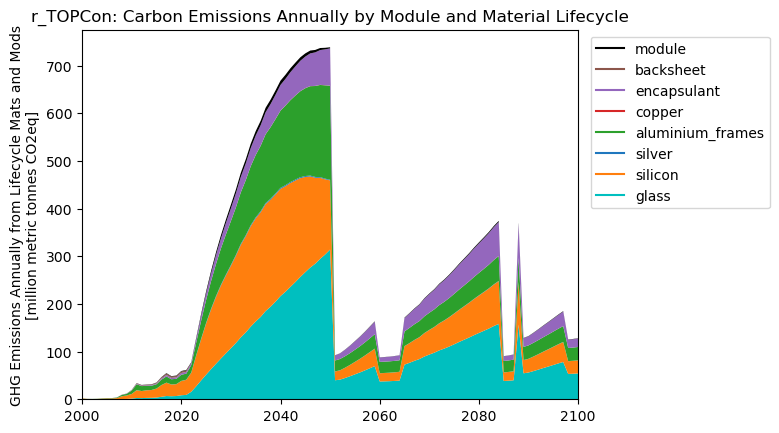

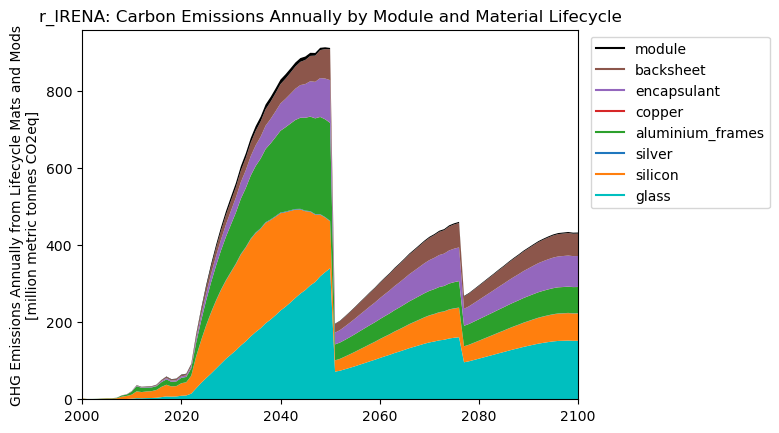

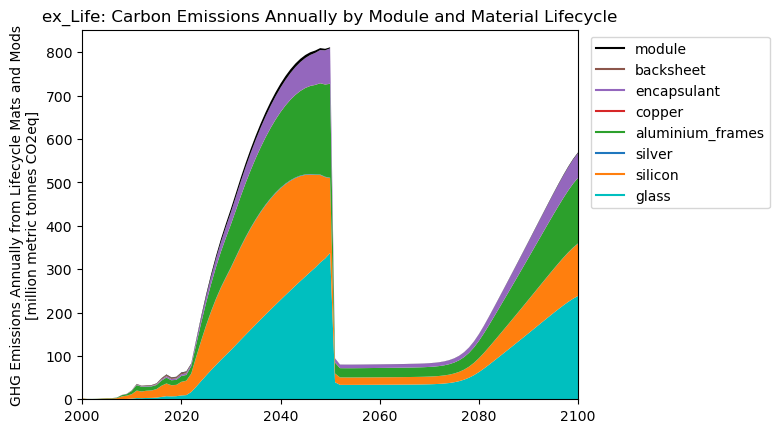

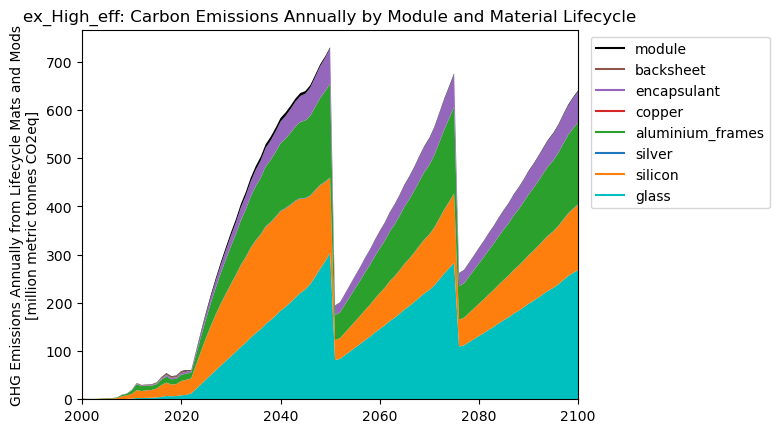

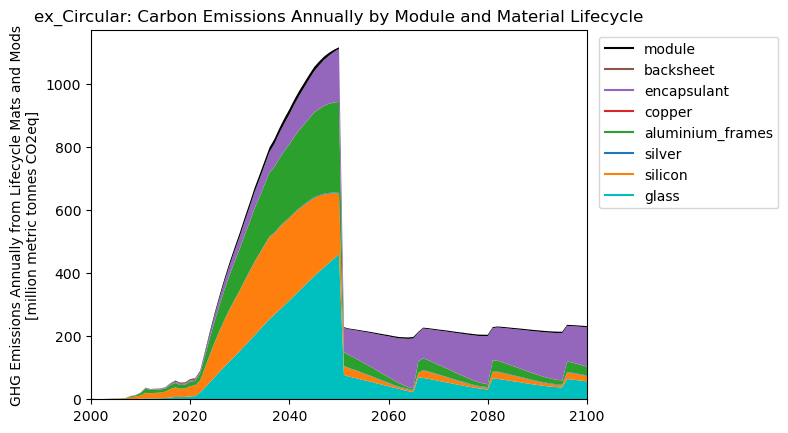

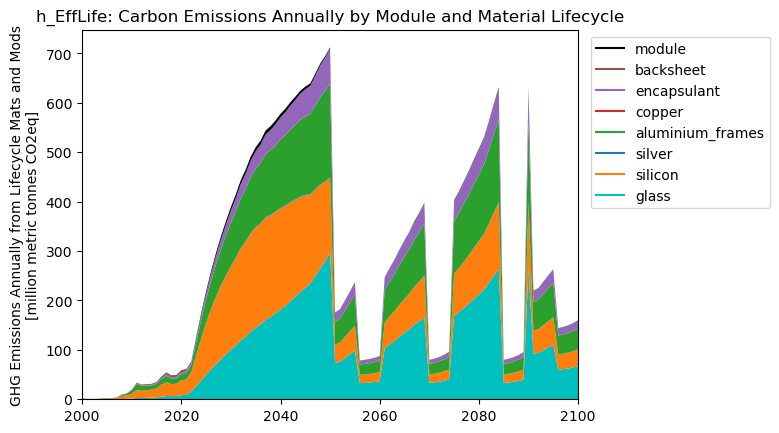

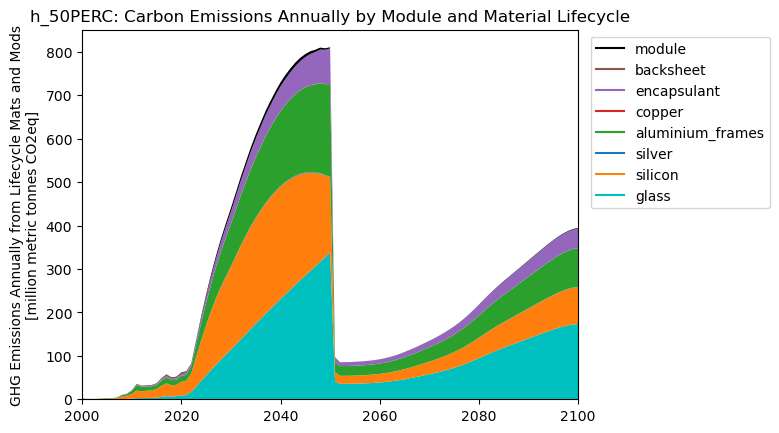

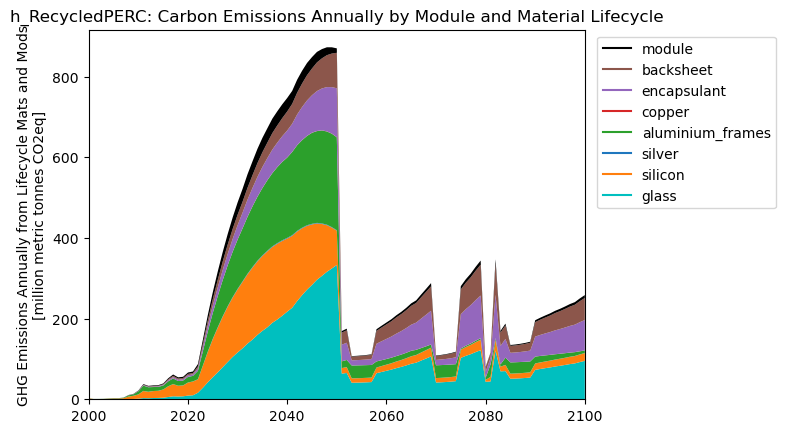

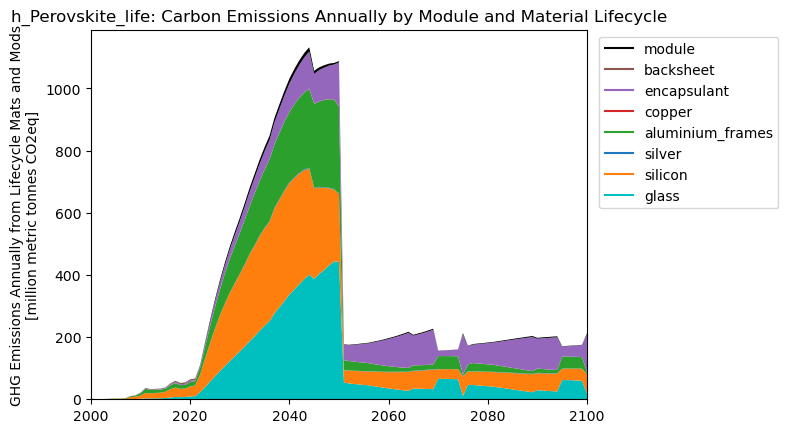

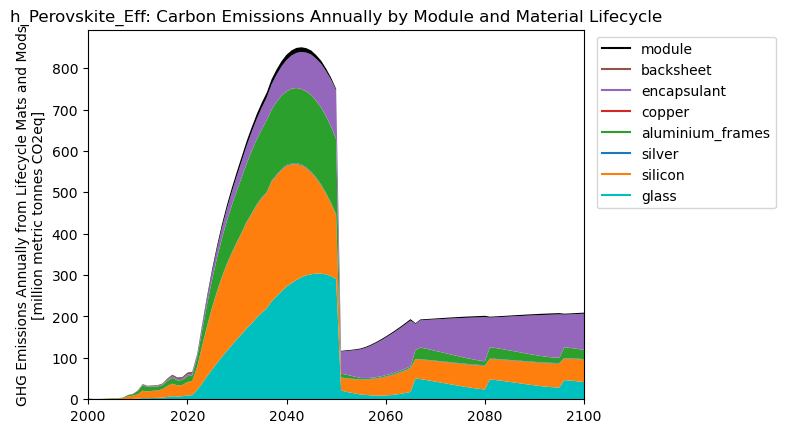

In [31]:
colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots
for scen in scenarios:

    scen_annual_carbon = sim_annual_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_annual_carbon.index,
                  scen_annual_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_mod_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes CO2eq]')
    plt.xlim(2000,2100)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))

#plt.legend()
    plt.show()

In [57]:
sim_cumu_carbon = sim_annual_carbon.cumsum()
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats')

PV_ICE_Annual_Emit_total_modmats_gCO2eq               3.493523e+16
r_PERC_Annual_Emit_total_modmats_gCO2eq               2.581105e+16
r_SHJ_Annual_Emit_total_modmats_gCO2eq                2.458668e+16
r_TOPCon_Annual_Emit_total_modmats_gCO2eq             2.510254e+16
r_IRENA_Annual_Emit_total_modmats_gCO2eq              3.728623e+16
ex_Life_Annual_Emit_total_modmats_gCO2eq              2.724193e+16
ex_High_eff_Annual_Emit_total_modmats_gCO2eq          3.525410e+16
ex_Circular_Annual_Emit_total_modmats_gCO2eq          3.246595e+16
h_EffLife_Annual_Emit_total_modmats_gCO2eq            2.710514e+16
h_50PERC_Annual_Emit_total_modmats_gCO2eq             2.728890e+16
h_RecycledPERC_Annual_Emit_total_modmats_gCO2eq       2.802858e+16
h_Perovskite_life_Annual_Emit_total_modmats_gCO2eq    3.255814e+16
h_Perovskite_Eff_Annual_Emit_total_modmats_gCO2eq     2.842920e+16
Name: 2100, dtype: float64

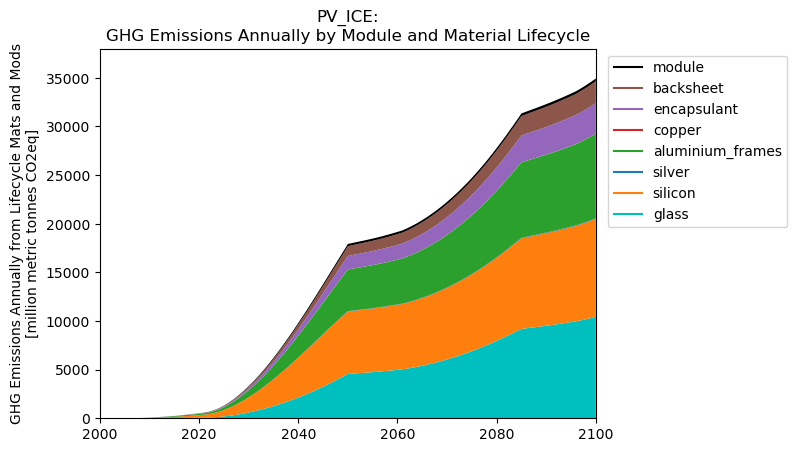

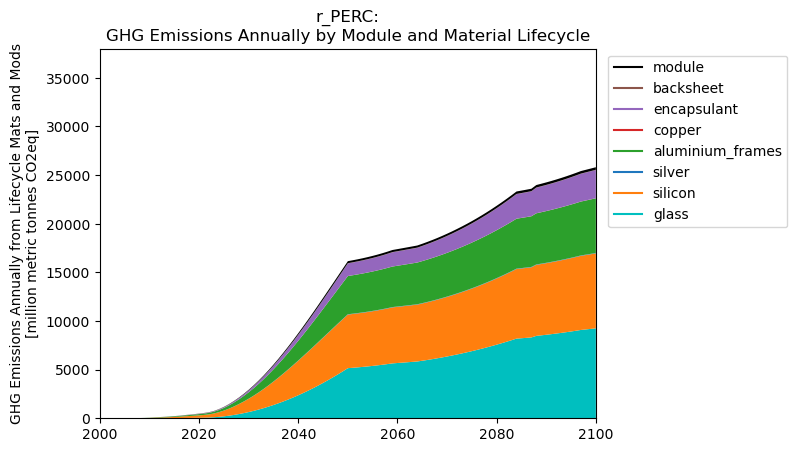

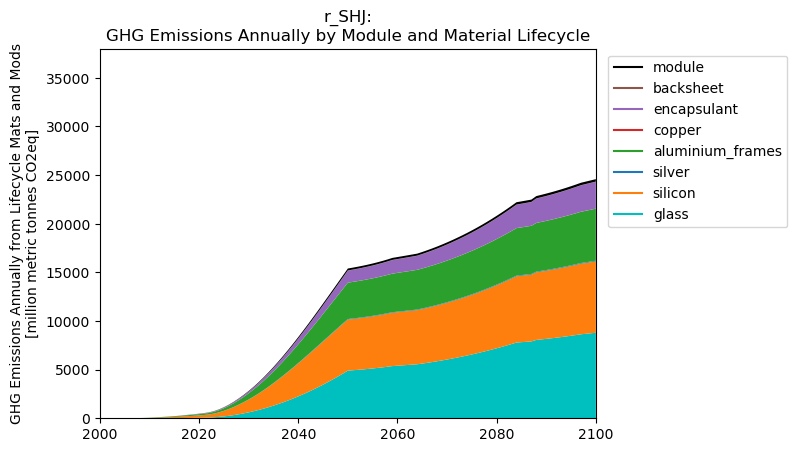

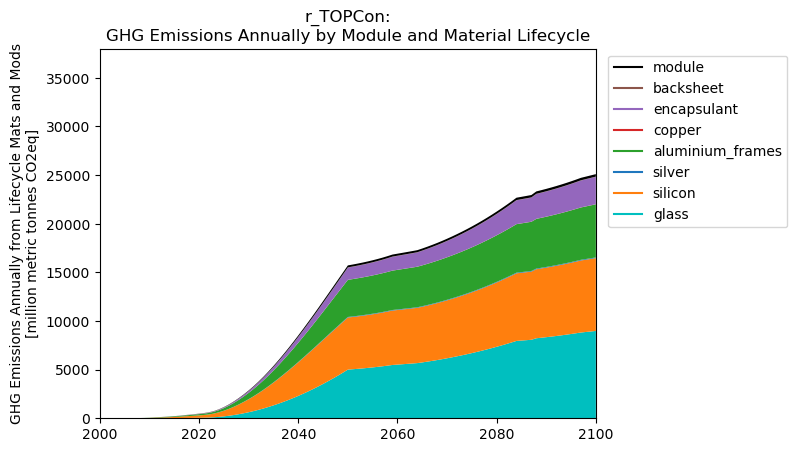

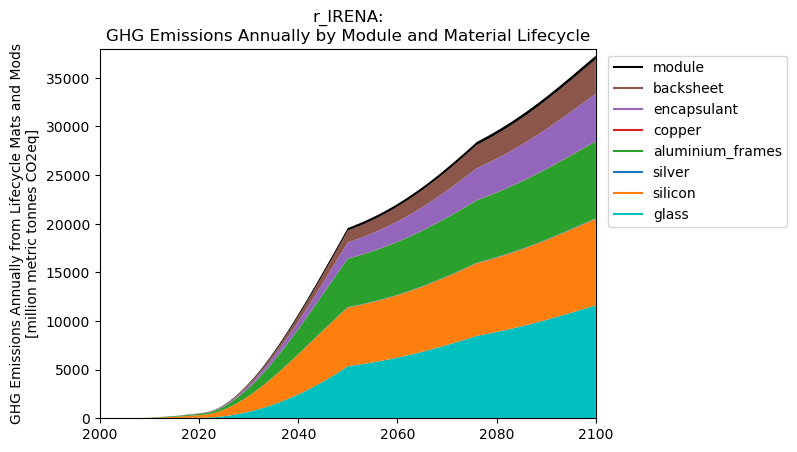

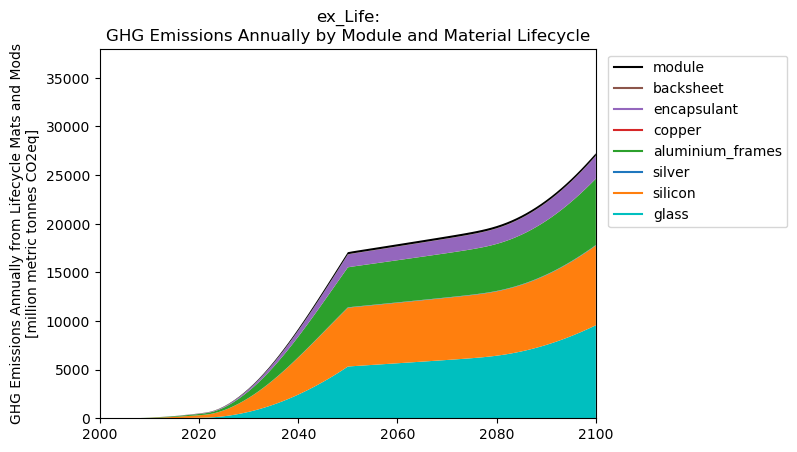

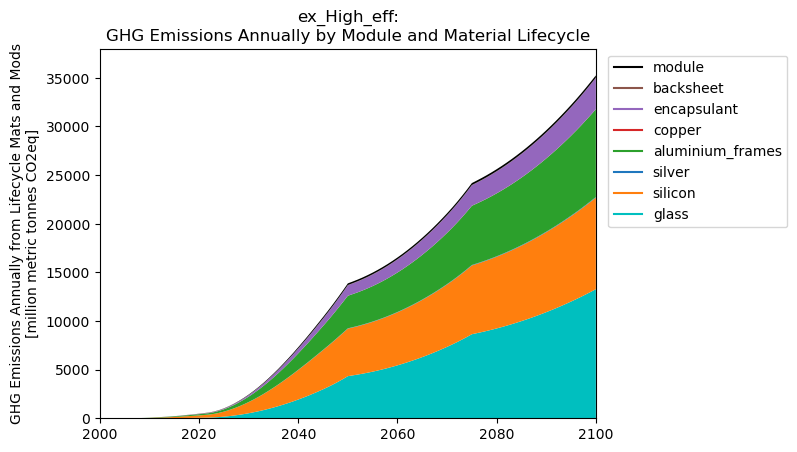

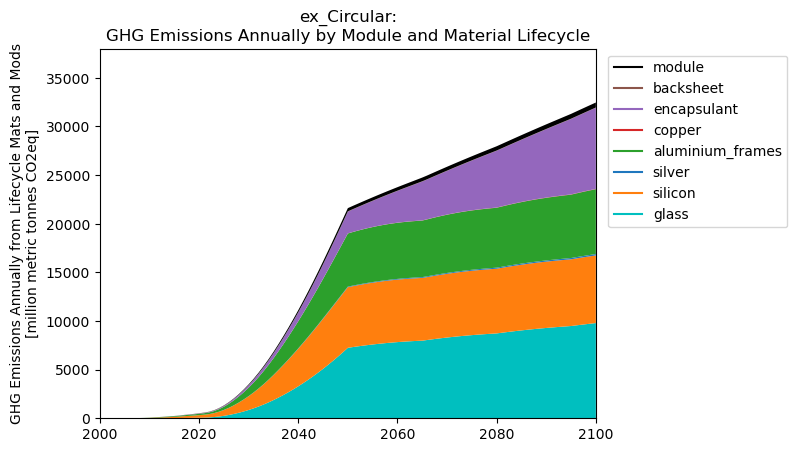

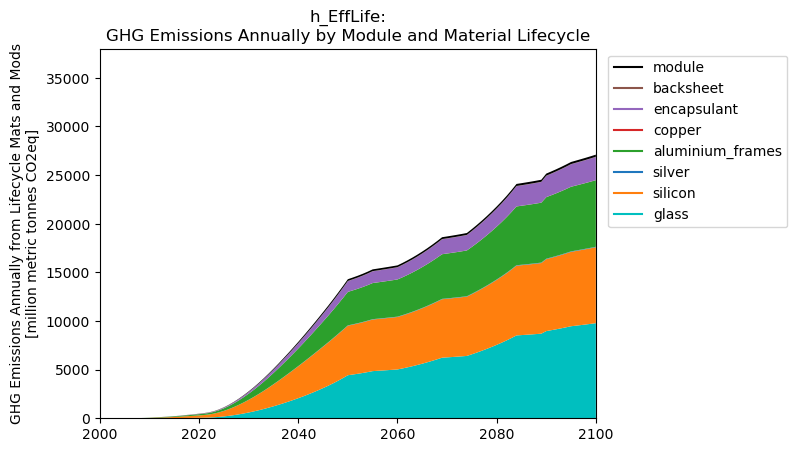

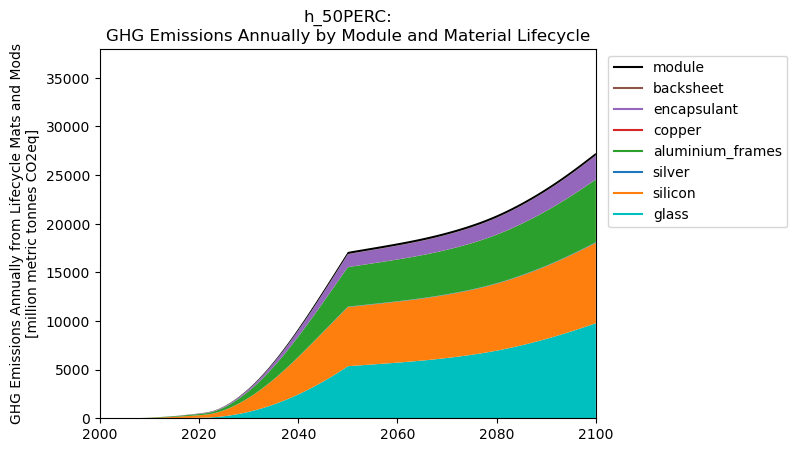

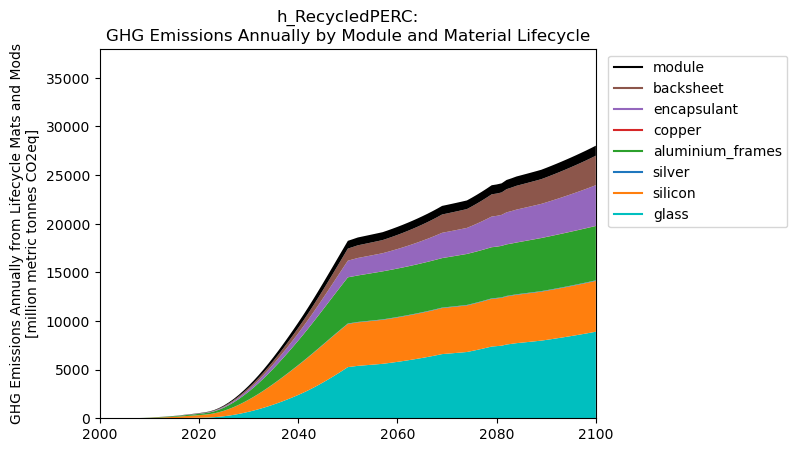

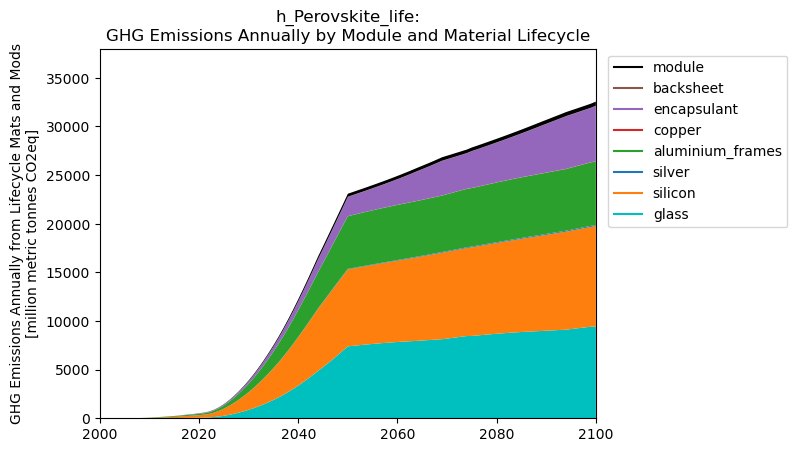

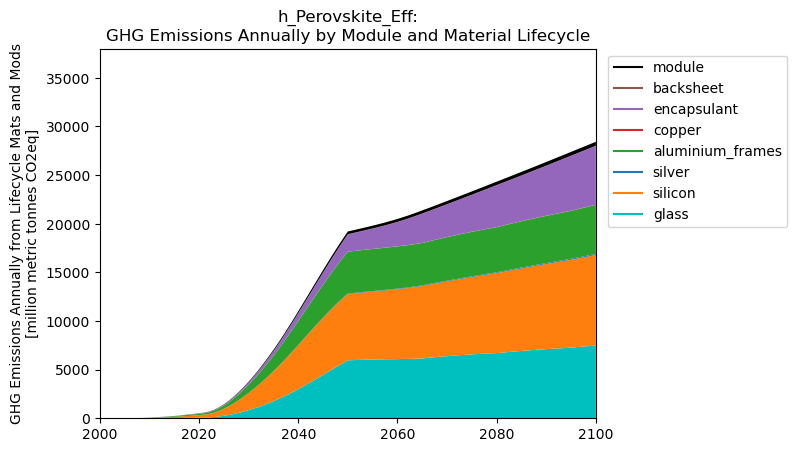

In [58]:
colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots
for scen in scenarios:

    scen_cumu_carbon = sim_cumu_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_cumu_carbon.index,
                  scen_cumu_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_mod_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes CO2eq]')
    plt.xlim(2000,2100)
    plt.ylim(0,38000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))

#plt.legend()
    plt.show()

In [ ]:
scen_cumu_carbon = scen_annual_carbon.cumsum()

In [ ]:
scen_cumu_carbon.loc[55,'Annual_Emit_total_gCO2eq']/1e12

In [ ]:
scen_annual_carbon.columns

In [ ]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#000000', #PV ICE baseline
              '#595959', '#7F7F7F', '#A6A6A6', '#D9D9D9', #BAU, 4 grays, perc, shj, topcon, irena
              #'#067872','#0aa39e','#09d0cd','#00ffff', #realistic cases (4) teals, perc, shj, topcon, irena
              '#0579C1','#C00000','#FFC000', #extreme cases (3) long life, high eff, circular
                '#6E30A0','#00B3B5','#10C483', #ambitious modules (5) high eff+ long life, 50 yr perc, recycleSi, 
               '#97CB3F','#FF7E00' #circular perovskite+life, circular perovkiste+ high eff
                ] 

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B'] #colors for material plots       

import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV_ICE','PERC','SHJ','TOPCon','Low\nQuality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff\n+ Long-life','Long-Life\n+ Recycling',
                         'Recycled-Si\n+ Long-life','Circular\n+ Long-life',
                        'Circular\n+ High Eff'
                    ]  

scennames_labels_flat = ['PV_ICE','PERC','SHJ','TOPCon','Low Quality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff + Long-life','Long-Life + Recycling',
                         'Recycled-Si + Long-life','Circular + Long-life',
                        'Circular + High Eff'
                    ] 